# Matplotlib Linear Regression Animation in Jupyter Notebook

This is a notebook for the medium article [Matplotlib Linear Regression Animation in Jupyter Notebook](https://bindichen.medium.com/matplotlib-linear-regression-animation-in-jupyter-notebook-2435b711bea2)

Please check out article for instructions

**License**: [BSD 2-Clause](https://opensource.org/licenses/BSD-2-Clause)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from vega_datasets import data

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Data Preprocessing

In [2]:
df = data.cars()
df.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


In [3]:
# Drop rows with NaN
df.dropna(subset=['Horsepower', 'Miles_per_Gallon'], inplace=True)

In [4]:
# Transform data
x = df['Horsepower'].to_numpy().reshape(-1, 1)
y = df['Miles_per_Gallon'].to_numpy().reshape(-1, 1)

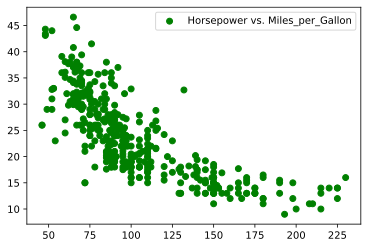

In [5]:
plt.scatter(x, y, c='g', label='Horsepower vs. Miles_per_Gallon')
plt.legend()
plt.show()

## 1. Animations with Interactive Plot

In [6]:
# Enable interactive plot
%matplotlib notebook
%matplotlib notebook

In [7]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.linear_model import LinearRegression

<IPython.core.display.Javascript object>


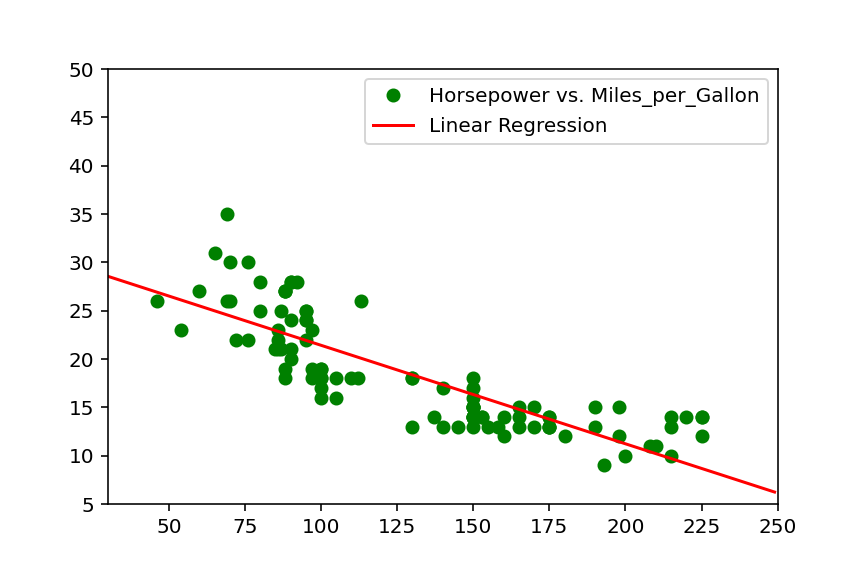

In [8]:
x_data = []
y_data = []

fig, ax = plt.subplots()     # A tuple unpacking to unpack the only fig
ax.set_xlim(30, 250)
ax.set_ylim(5, 50)
# Plotting 
scatter, = ax.plot([], [], 'go', label='Horsepower vs. Miles_per_Gallon')
line, = ax.plot([], [], 'r', label='Linear Regression')
ax.legend()

reg = LinearRegression()

def animate(frame_num):
    # Adding data
    x_data.append(x[frame_num])
    y_data.append(y[frame_num])
    # Convert data to numpy array
    x_train = np.array(x_data).reshape(-1, 1)
    y_train = np.array(y_data).reshape(-1, 1)
    # Fit values to a linear regression
    reg.fit(x_train, y_train)

    # update data for scatter plot
    scatter.set_data((x_data, y_data))
    # Predict value and update data for line plot
    line.set_data((list(range(250)), reg.predict(np.array([entry for entry in range(250)]).reshape(-1, 1))))

anim = FuncAnimation(fig, animate, frames=len(x), interval=20)
plt.show()

## 3. Animations with embedded HTML5 video

In [9]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display

# Turn off matplotlib plot in Notebook
plt.ioff()
# Pass the ffmpeg path
plt.rcParams['animation.ffmpeg_path'] = '/Users/chen5/Downloads/ffmpeg'

In [10]:
x_data = []
y_data = []

fig, ax = plt.subplots()
ax.set_xlim(30, 250)
ax.set_ylim(5, 50)
scatter, = ax.plot([], [], 'go', label='Horsepower vs. Miles_per_Gallon')
line, = ax.plot([], [], 'r', label='Linear Regression')
ax.legend()

reg = LinearRegression()

def animate(frame_num):
    # Adding data
    x_data.append(x[frame_num])
    y_data.append(y[frame_num])
    # Convert data to numpy array
    x_train = np.array(x_data).reshape(-1, 1)
    y_train = np.array(y_data).reshape(-1, 1)
    reg.fit(x_train, y_train)
    
    # update data for scatter plot
    scatter.set_data((x_data, y_data))
    # Predict value and update data for line plot
    line.set_data((list(range(250)), reg.predict(np.array([entry for entry in range(250)]).reshape(-1, 1))))

anim = FuncAnimation(fig, animate, frames=len(x), interval=20)

video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

# Note Github only render static HTML and the embeded HTML5 video won't be displayed, 
# The embedded video should be working if you host the Notebook or open it locally. 

## Thanks for reading

This is a notebook for the medium article [Matplotlib Linear Regression Animation in Jupyter Notebook](https://bindichen.medium.com/matplotlib-linear-regression-animation-in-jupyter-notebook-2435b711bea2)

**License**: [BSD 2-Clause](https://opensource.org/licenses/BSD-2-Clause)